In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data
data_train = pd.read_csv('../data/ml/hotel_reservations_train.csv')
data_test = pd.read_csv('../data/ml/hotel_reservations_test.csv')

X_train = data_train.drop('booking_status', axis=1)
y_train = data_train['booking_status']

X_test = data_test.drop('booking_status', axis=1)
y_test = data_test['booking_status']

In [39]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,                   # Number of trees in the forest
    criterion='gini',                   # Function to measure the quality of a split
    max_depth=None,                     # Maximum depth of the tree
    min_samples_split=2,                # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                 # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum total of weights
    max_features='sqrt',                # Number of features to consider when looking for the best split
    max_leaf_nodes=None,                # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,          # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                     # Whether bootstrap samples are used when building trees
    oob_score=False,                    # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                        # The number of jobs to run in parallel
    random_state=42,                    # Seed of the pseudo random number generator
    verbose=1,                          # Controls the verbosity when fitting and predicting
    warm_start=False,                   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight=None,                  # Weights associated with classes in the form {class_label: weight}
    ccp_alpha=0.0,                      # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                    # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

In [40]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


RandomForestClassifier(random_state=42, verbose=1)

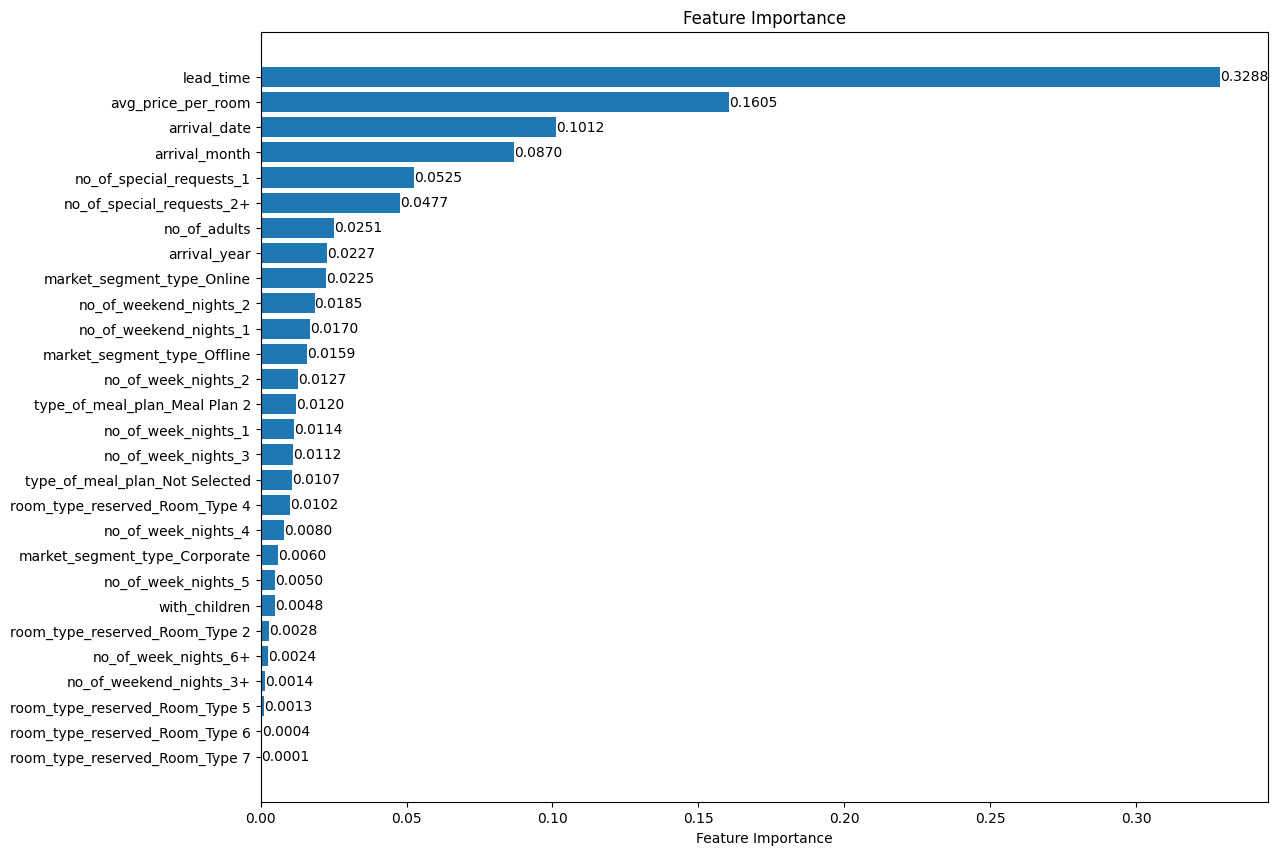

In [52]:
# Sort model.feature_importance and print with feature names
feature_importance = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(13, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

# Print the value of each importance
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()

## Forward Stepwise Selection

In [57]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [58]:
from sklearn.model_selection import cross_val_score

def forward_selection(predictors):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    results = []

    for p in remaining_predictors:
        score = cross_val_score(model, X_train[predictors + [p]], y_train, cv=5, scoring='accuracy').mean()
        results.append((p, score))
        
    results.sort(key=lambda x: x[1], reverse=True)
    return results[0]

In [59]:
predictors = []
selected_features = []
scores = []

# For each number of features 
for i in range(len(X_train.columns)):
    best_predictor, best_score = forward_selection(predictors)
    predictors.append(best_predictor)
    selected_features.append(best_predictor)
    scores.append(best_score)
    print(f"Selected {best_predictor} with cross-validated accuracy: {best_score:.4f}")

# Display the selected features and their scores
selected_df = pd.DataFrame({'Feature': selected_features, 'Accuracy': scores})
print(selected_df)

Selected lead_time with cross-validated accuracy: 0.7667
Selected avg_price_per_room with cross-validated accuracy: 0.8097
Selected arrival_date with cross-validated accuracy: 0.8269
Selected no_of_special_requests_1 with cross-validated accuracy: 0.8400
Selected no_of_special_requests_2+ with cross-validated accuracy: 0.8649
Selected arrival_month with cross-validated accuracy: 0.8800
Selected market_segment_type_Offline with cross-validated accuracy: 0.8894


KeyboardInterrupt: 